In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_frame = pd.DataFrame({
    
    'Names': ['Petko', 'Margi', 'Vesi','Dido','Mato','Penko','Diana','Rosi','Igor','Volodq' ],
    'ID': [920390220112, 920390220136, 920390220158, 920390220213, 920390220237, 920390220272,
           920390200312 , 920390220316, 920390220332, 920390220413],
    'Position': ['Front End Developer', 'Designer', 'Front End Developer', 'Back End Developer',
                 'Designer', 'Front End Developer', 'Team Lidder', 'Front End Developer',
                 'Back End Developer','Designer'],
    '1 Year Salary in $': [1200, 1350, 1280, 1320, 1375, 1240, 1500, 1220, 1420, 1325],
    'salary increase after 3d Year in %': [35, 30, 27, 32, 20, 25, 30, 22, 30, 28],
    '3 Years Salary in $': [1620, 1755, 1625, 1642, 1650, 1550, 1950, 1488, 1846, 1696],
    'salary increase after 5th Year in %':  [82, 72 ,77, 83, 75, 79, 84, 85, 76, 69],
    'Salary after 5th Year in $': [2948, 3018, 2876, 3004, 2887, 2774, 3588, 2752, 3249 ,2866],
    'Projects 1 Year': [5, 3, 3, 2, 4, 4, 2, 8, 3, 4],
    'Projects 2 Year': [7, 4, 5, 4, 6, 5, 3, 6, 3, 4],
    'Projects 3 Year': [8, 6, 6, 5, 8, 8, 5, 4, 5, 3],
    'Projects 4 Year': [10, 7, 6, 7, 9, 7, 4, 6, 4 , 3],
    'Projects 5 Year': [12, 9, 7, 9, 11, 12, 7, 6, 5 , 6]
})

data_frame

,Names,ID,Position,1 Year Salary in $,salary increase after 3d Year in %,3 Years Salary in $,salary increase after 5th Year in %,Salary after 5th Year in $,Projects 1 Year,Projects 2 Year,Projects 3 Year,Projects 4 Year,Projects 5 Year
0,Petko,920390220112,Front End Developer,1200,35,1620,82,2948,5,7,8,10,12
1,Margi,920390220136,Designer,1350,30,1755,72,3018,3,4,6,7,9
2,Vesi,920390220158,Front End Developer,1280,27,1625,77,2876,3,5,6,6,7
3,Dido,920390220213,Back End Developer,1320,32,1642,83,3004,2,4,5,7,9
4,Mato,920390220237,Designer,1375,20,1650,75,2887,4,6,8,9,11
5,Penko,920390220272,Front End Developer,1240,25,1550,79,2774,4,5,8,7,12
6,Diana,920390200312,Team Lidder,1500,30,1950,84,3588,2,3,5,4,7
7,Rosi,920390220316,Front End Developer,1220,22,1488,85,2752,8,6,4,6,6
8,Igor,920390220332,Back End Developer,1420,30,1846,76,3249,3,3,5,4,5
9,Volodq,920390220413,Designer,1325,28,1696,69,2866,4,4,3,3,6


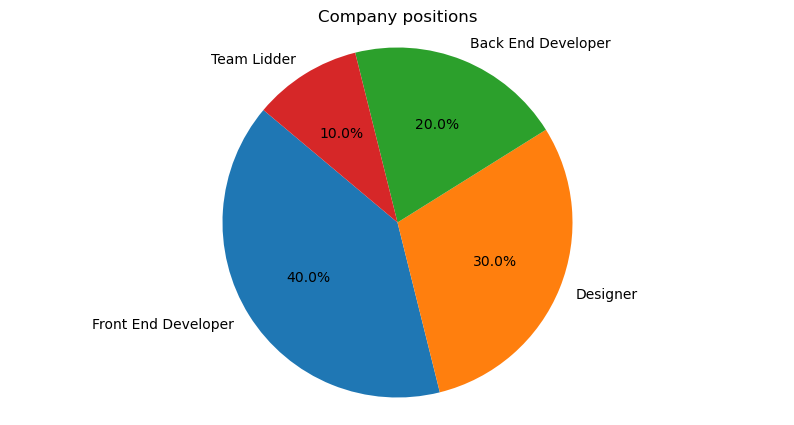

In [42]:
data_frame = pd.DataFrame(data_frame)

position_counts = data_frame['Position'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Company positions')
plt.axis('equal')
plt.show()

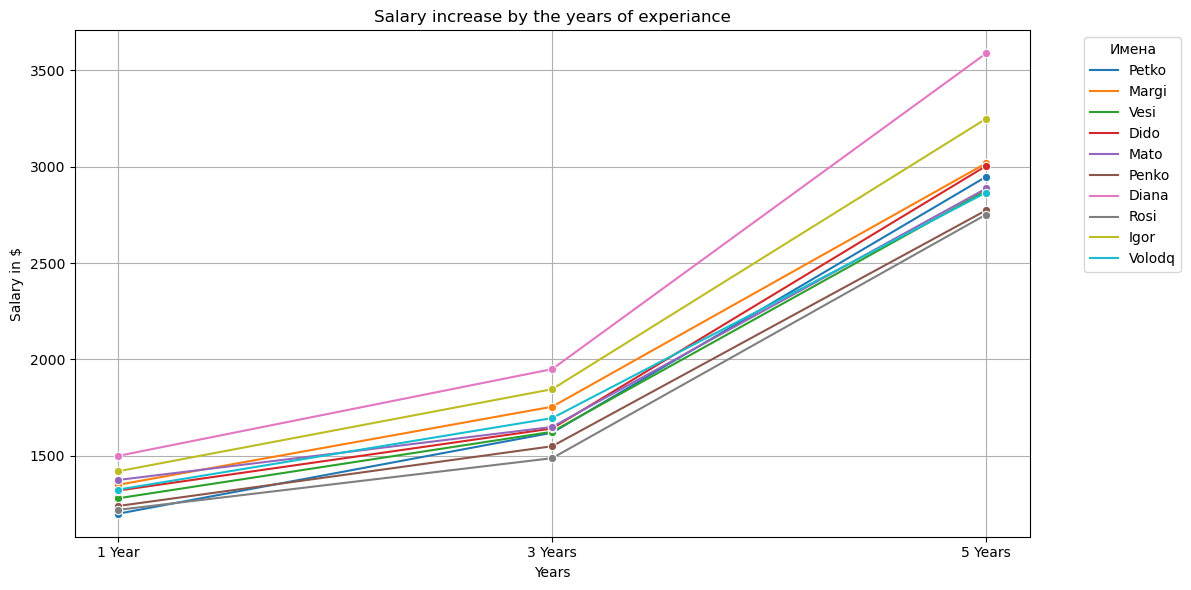

In [50]:
data_frame = pd.DataFrame(data_frame)

data_frame

data_long = pd.melt(data_frame, id_vars=['Names'], value_vars=['1 Year Salary in $', '3 Years Salary in $', 'Salary after 5th Year in $'],
                    var_name='Year', value_name='Salary')
data_long['Year'] = data_long['Year'].replace({'1 Year Salary in $': '1 Year', '3 Years Salary in $': '3 Years', 'Salary after 5th Year in $': '5 Years'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_long, x='Year', y='Salary', hue='Names', marker='o')

plt.title('Salary increase by the years of experiance')
plt.xlabel('Years')
plt.ylabel('Salary in $')
plt.legend(title='Имена', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

              Position  1 Year Salary in $  3 Years Salary in $  \
0   Back End Developer              1370.0          1744.000000   
1             Designer              1350.0          1700.333333   
2  Front End Developer              1235.0          1570.750000   
3          Team Lidder              1500.0          1950.000000   

   Salary after 5th Year in $  
0                 3126.500000  
1                 2923.666667  
2                 2837.500000  
3                 3588.000000  


<Figure size 1200x600 with 0 Axes>

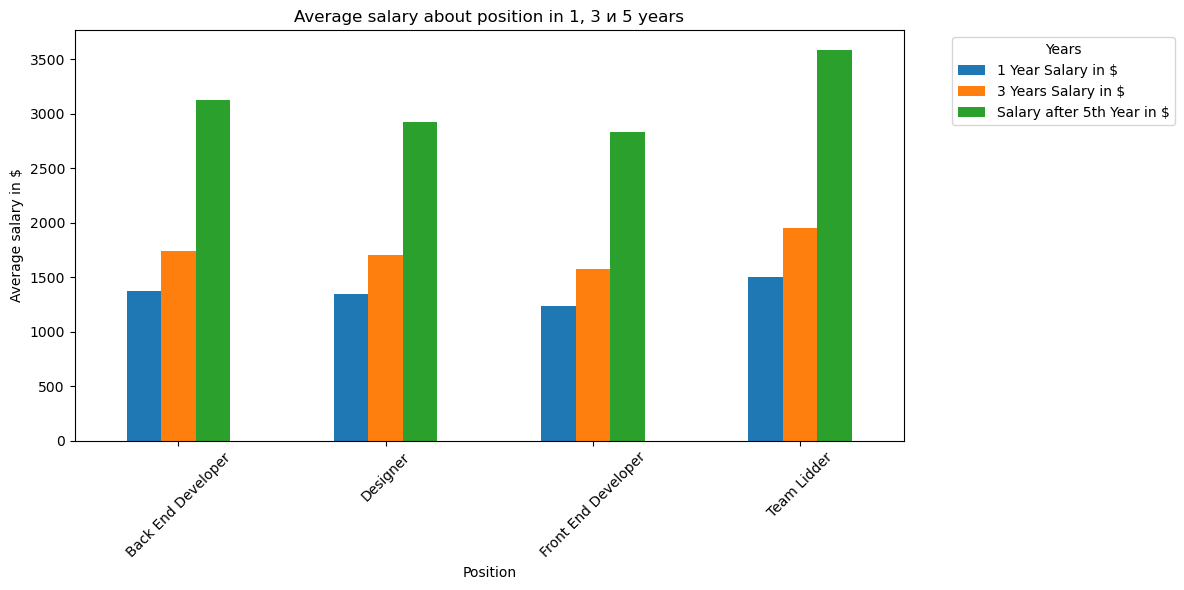

In [52]:
data_frame = pd.DataFrame(data_frame)

# Филтриране на позициите
positions_to_compare = ["Team Lidder", "Front End Developer", "Back End Developer", "Designer"]

# Филтриране на DataFrame за избраните позиции
filtered_data = data_frame[data_frame['Position'].isin(positions_to_compare)]

# Групиране по позиции и изчисляване на средната заплата за 1ва, 3та и 5та година
average_salaries = filtered_data.groupby('Position')[['1 Year Salary in $', '3 Years Salary in $', 'Salary after 5th Year in $']].mean().reset_index()

# Показване на средните заплати за всяка позиция
print(average_salaries)

# Визуализация с помощта на bar plot
plt.figure(figsize=(12, 6))

# Подреждане на данните по позициите
average_salaries = average_salaries.set_index('Position')

# Създаване на барплот за всяка година
average_salaries.plot(kind='bar', figsize=(12, 6))

plt.title('Average salary about position in 1, 3 и 5 years')
plt.xlabel('Position')
plt.ylabel('Average salary in $')
plt.xticks(rotation=45)
plt.legend(title='Years', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

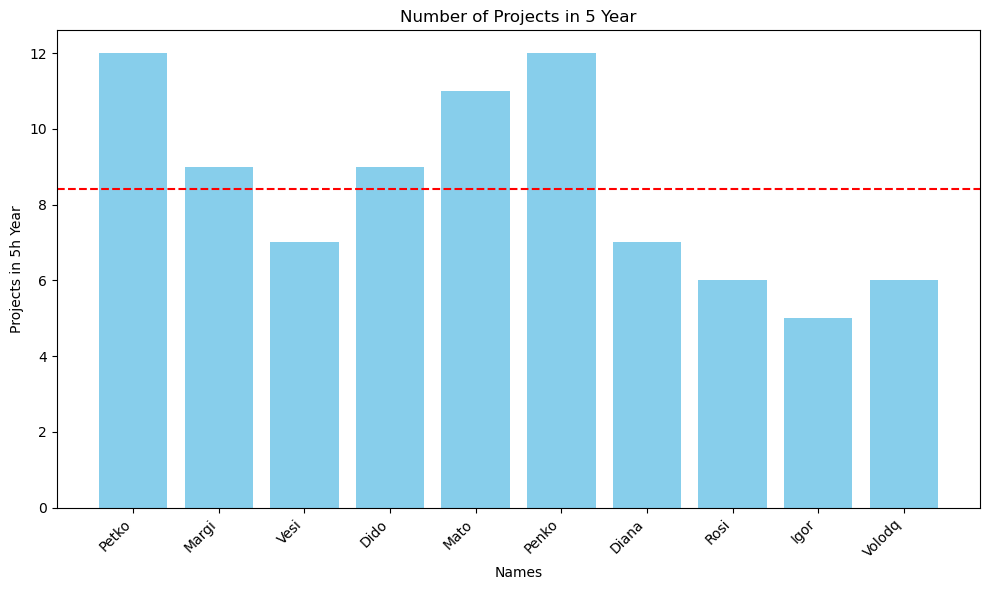

In [53]:
projets_5th_year = data_frame['Projects 5 Year']

mean_projets_5th_year = projets_5th_year.mean()
plt.figure(figsize=(10, 6))
plt.bar(data_frame['Names'], projets_5th_year, color='skyblue')
plt.axhline(y=mean_projets_5th_year, color='red', linestyle='--', label=f'Mean: {mean_projets_5th_year:.2f}')

plt.xlabel('Names')
plt.ylabel('Projects in 5h Year')
plt.title('Number of Projects in 5 Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

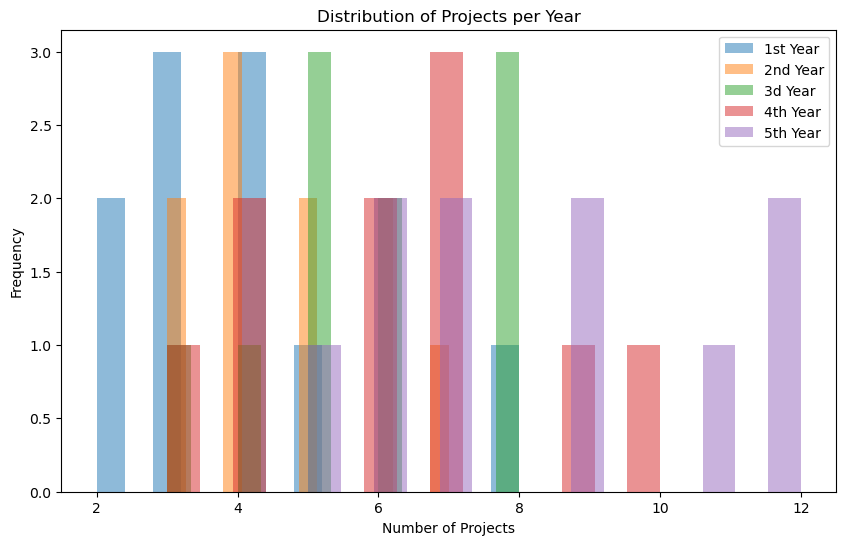

In [54]:
# Създаване на хистограма с Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data_frame['Projects 1 Year'], bins=15, alpha=0.5, label='1st Year')
plt.hist(data_frame['Projects 2 Year'], bins=15, alpha=0.5, label='2nd Year')
plt.hist(data_frame['Projects 3 Year'], bins=15, alpha=0.5, label='3d Year')
plt.hist(data_frame['Projects 4 Year'], bins=15, alpha=0.5, label='4th Year')
plt.hist(data_frame['Projects 5 Year'], bins=15, alpha=0.5, label='5th Year')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')
plt.title('Distribution of Projects per Year')
plt.legend(loc='upper right')
plt.show()

In [55]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# for year in range(1, 6):
    #projects_year = data_frame[f'Projects {year} Year']

   # plt.figure(figsize=(10, 6))
   # plt.bar(data_frame['Names'], projects_year, color=colors[year - 1])
   # plt.xlabel('Names')
   # plt.ylabel(f'Projects in {year} Year')
   # plt.title(f'Number of Projects in {year} Year')
   # plt.xticks(rotation=45, ha='right')
   # plt.tight_layout()
   # plt.show()

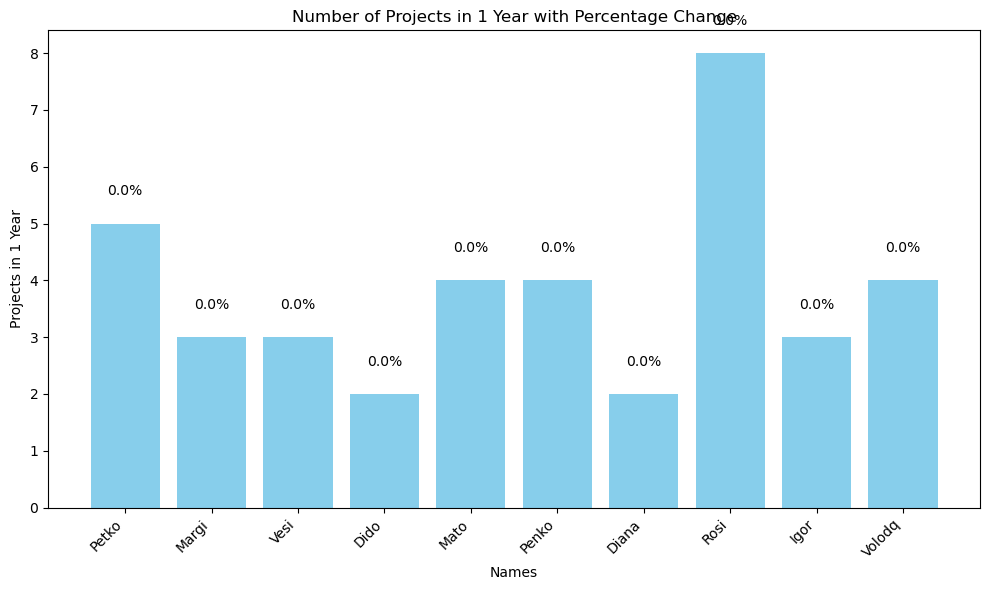

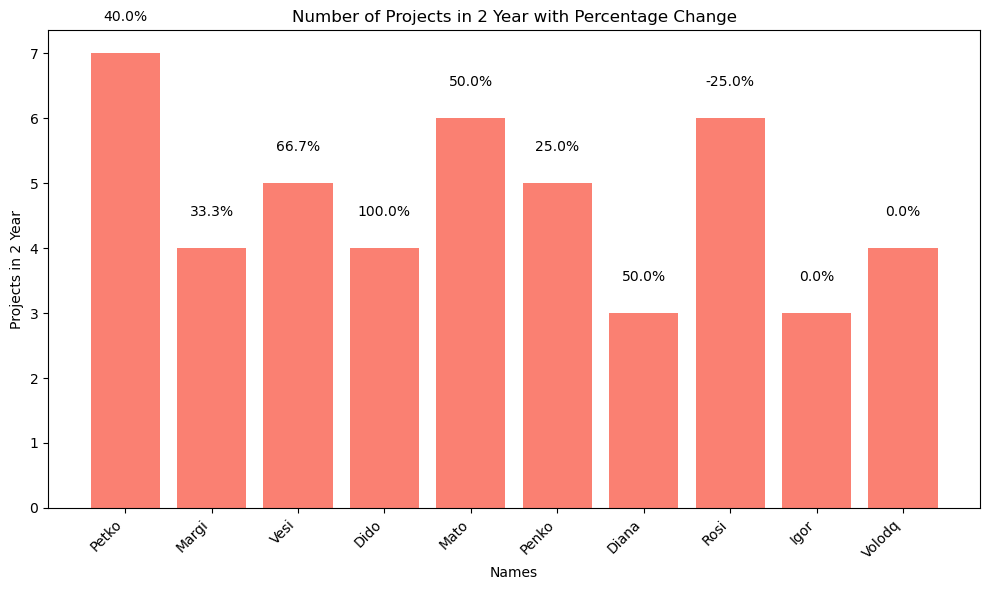

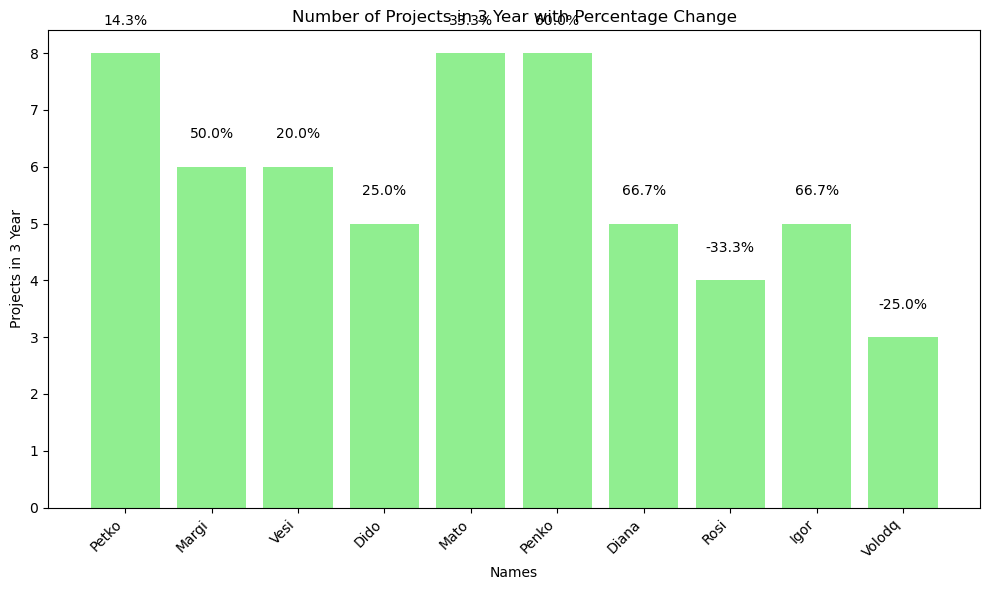

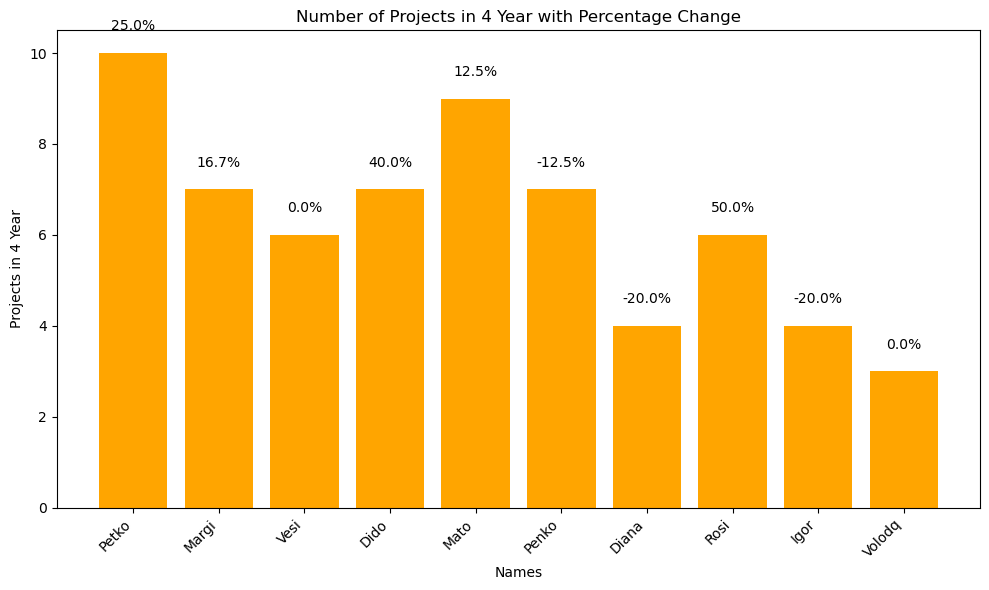

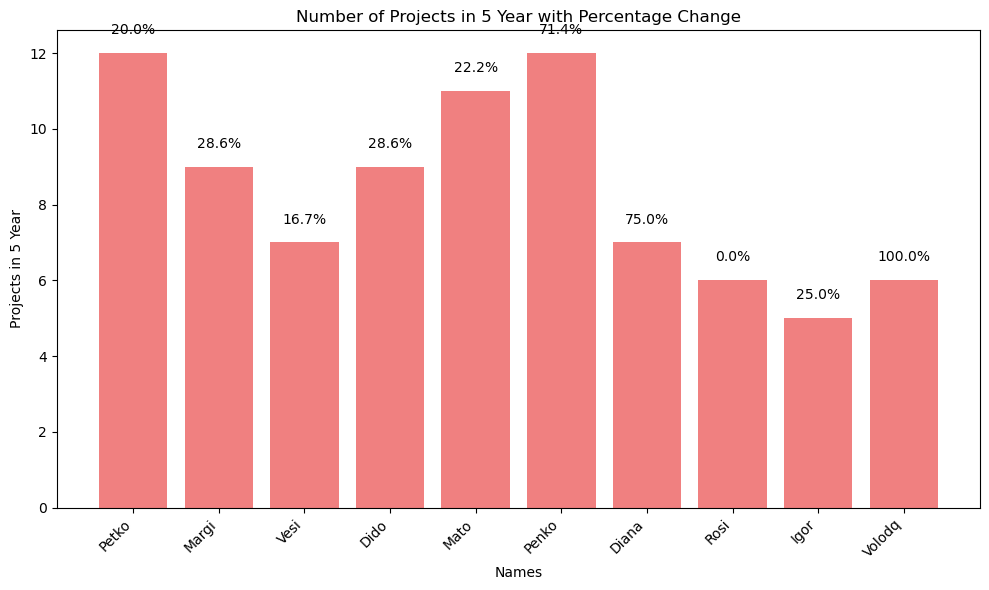

In [56]:
for year in range(1, 6):
    projects_year = data_frame[f'Projects {year} Year']
    if year == 1:
        percentage_change = [0] * len(data_frame)
    else:
        prev_projects = data_frame[f'Projects {year - 1} Year']
        percentage_change = [(projects - prev) / prev * 100 for projects, prev in zip(projects_year, prev_projects)]

    # Създаване на диаграма с информация за процентното увеличение или намаление
    plt.figure(figsize=(10, 6))
    plt.bar(data_frame['Names'], projects_year, color=colors[year - 1])
    for i, (x, y) in enumerate(zip(data_frame['Names'], projects_year)):
        plt.text(x=i, y=y + 0.5, s=f'{percentage_change[i]:.1f}%', ha='center')
    plt.xlabel('Names')
    plt.ylabel(f'Projects in {year} Year')
    plt.title(f'Number of Projects in {year} Year with Percentage Change')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [57]:
data_frame['Total Projects'] = data_frame[['Projects 1 Year', 'Projects 2 Year', 'Projects 3 Year', 'Projects 4 Year', 'Projects 5 Year']].sum(axis=1)
data_frame

,Names,ID,Position,1 Year Salary in $,salary increase after 3d Year in %,3 Years Salary in $,salary increase after 5th Year in %,Salary after 5th Year in $,Projects 1 Year,Projects 2 Year,Projects 3 Year,Projects 4 Year,Projects 5 Year,Total Projects
0,Petko,920390220112,Front End Developer,1200,35,1620,82,2948,5,7,8,10,12,42
1,Margi,920390220136,Designer,1350,30,1755,72,3018,3,4,6,7,9,29
2,Vesi,920390220158,Front End Developer,1280,27,1625,77,2876,3,5,6,6,7,27
3,Dido,920390220213,Back End Developer,1320,32,1642,83,3004,2,4,5,7,9,27
4,Mato,920390220237,Designer,1375,20,1650,75,2887,4,6,8,9,11,38
5,Penko,920390220272,Front End Developer,1240,25,1550,79,2774,4,5,8,7,12,36
6,Diana,920390200312,Team Lidder,1500,30,1950,84,3588,2,3,5,4,7,21
7,Rosi,920390220316,Front End Developer,1220,22,1488,85,2752,8,6,4,6,6,30
8,Igor,920390220332,Back End Developer,1420,30,1846,76,3249,3,3,5,4,5,20
9,Volodq,920390220413,Designer,1325,28,1696,69,2866,4,4,3,3,6,20


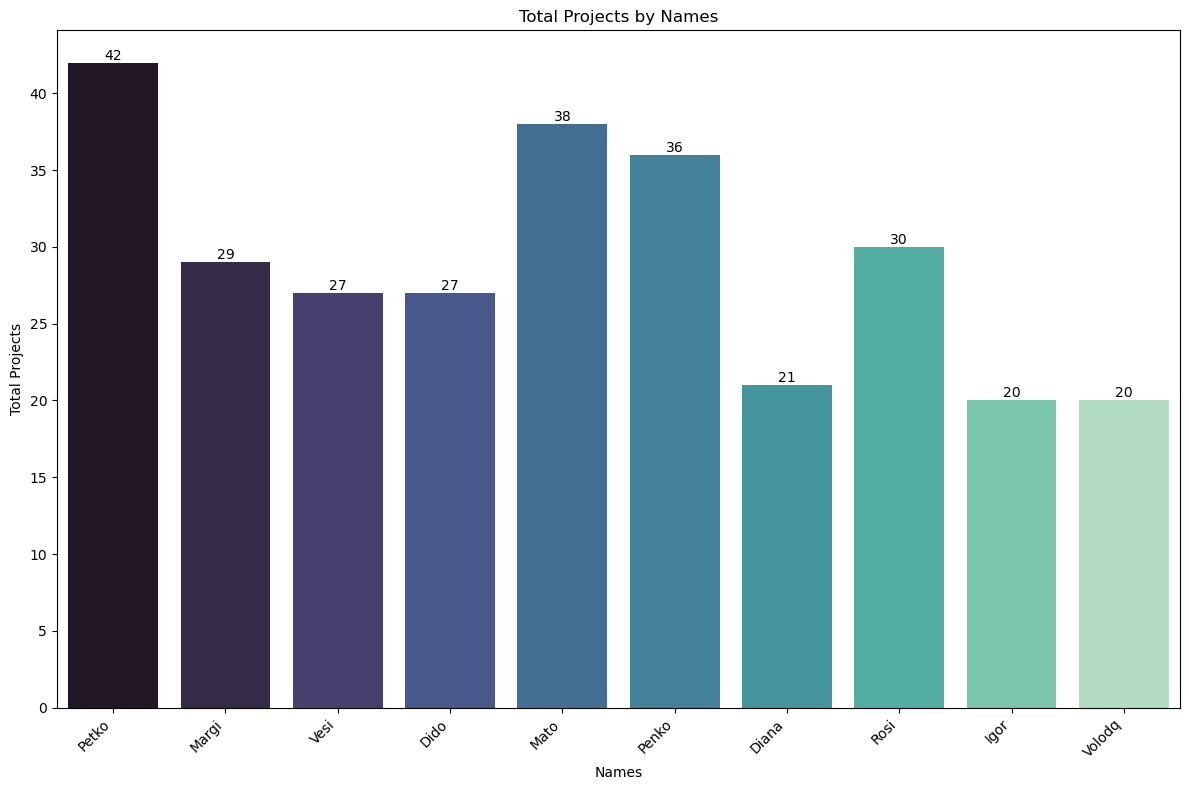

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Names', y='Total Projects', data=data_frame, palette='mako')
plt.xlabel('Names')
plt.ylabel('Total Projects')
plt.title('Total Projects by Names')
plt.xticks(rotation=45, ha='right')

total_projects = data_frame['Total Projects']
for i, projects in enumerate(total_projects):
    plt.text(i, projects, f'{projects}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

In [39]:
data_frame[['1 Year Salary in $', '3 Years Salary in $', 'Salary after 5th Year in $']].describe()

,1 Year Salary in $,3 Years Salary in $,Salary after 5th Year in $
count,10.000000,10.000000,10.000000
mean,1323.000000,1682.200000,2996.200000
std,93.487967,137.040789,251.512226
min,1200.000000,1488.000000,2752.000000
25%,1250.000000,1621.250000,2868.500000
50%,1322.500000,1646.000000,2917.500000
75%,1368.750000,1740.250000,3014.500000
max,1500.000000,1950.000000,3588.000000


In [59]:
data_frame.to_csv('programmerCompany.csv', index= False)